In [1]:
import pandas as pd
import time
import numpy as np
np.seterr(invalid='ignore')
import nbimporter
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
import plotly.graph_objects as go
import plotly.offline as pyo
pd.options.display.max_columns = 999

In [9]:
file_path = 'Nuggets/Offense/Team.json'
defense_path = 'Nuggets/Defense/Team.json'

opp_off_path = 'Opponent/Offense/Team.json'

with open (file_path, 'r') as f:
    file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
with open (opp_off_path, 'r') as o:
    opp_off_file = json.load(o)
    
print(file.keys())

dict_keys(['ovr_data', 'Rim', '3ptZ2', '3ptZ5', '3ptZ3', '3ptZ4', 'SMZ3', 'LMZ3', '3ptZ1', 'LMZ2', 'SMZ1 ', 'SMZ2', 'LMZ5'])


In [12]:
data_PPP = file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)
print('NUGGETS OFFENSE PPP')
data_PPP

NUGGETS OFFENSE PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.13,12.1,3,35.5,0.15,68.44,3.46,7,57.1,3.14,6,50.0,3.83,1.01,11.0,3,64.5,0.29,69.8,3.57,6,75.0,3.5,4,33.3,3.67,1.33,15.0,0,35.5,0.0,66.67,3.33,3,33.3,2.67,3,66.7,3.67
PNR Screener,0.0,1.4,0,50.0,0.0,0.0,2.0,2,0.0,2.0,0,N/A,N/A,0.0,1.0,0,50.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A,0.0,2.5,0,50.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A
DHO Ball Handler,2.0,2.9,0,50.0,0.0,100.0,3.25,1,100.0,3.0,3,66.7,3.33,3.0,2.0,0,50.0,0.0,150.0,3.0,0,N/A,N/A,2,100.0,3.0,1.0,5.0,0,50.0,0.0,50.0,3.5,1,100.0,3.0,1,0.0,3.0
DHO Screener,3.0,0.7,0,100.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,4.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,3.0,2.5,0,100.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,N/A
ISOLATION,1.07,23.6,1,30.1,0.41,57.34,3.07,17,52.9,2.59,10,30.0,3.9,0.91,23.2,1,69.9,0.5,49.81,2.44,19,46.7,2.33,3,0.0,3.0,1.42,24.7,0,30.1,0.22,74.15,4.33,2,100.0,4.5,7,42.9,3.0
TRANSITION,1.21,25.5,4,44.5,0.37,69.44,4.07,16,68.8,4.31,11,36.4,3.73,1.02,19.8,4,55.5,0.46,65.79,4.0,13,66.7,4.22,6,25.0,3.5,1.46,39.4,0,44.5,0.29,72.97,4.14,8,71.4,4.43,7,42.9,3.5
Attacking Closeouts,1.21,7.1,2,30.4,0.29,80.65,3.14,4,100.0,3.0,3,33.3,3.33,1.31,6.9,2,69.6,0.5,101.35,3.0,6,100.0,3.0,0,N/A,N/A,1.0,7.5,0,30.4,0.0,50.0,3.33,0,N/A,N/A,3,33.3,N/A
Catch & Shoot,1.5,14.4,0,0.0,0.0,75.0,4.05,0,N/A,N/A,20,50.0,4.05,1.5,20.2,0,100.0,0.0,75.0,4.05,0,N/A,N/A,20,50.0,4.05,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.05
Off Ball Screens,1.35,3.2,1,22.5,0.33,87.21,3.0,1,100.0,0.0,2,50.0,4.5,0.87,3.5,1,77.5,0.5,61.48,2.5,2,100.0,0.0,1,0.0,5.0,3.0,2.5,0,22.5,0.0,150.0,4.0,0,N/A,N/A,1,100.0,5.0
Cutting,1.02,4.2,0,0.0,0.4,51.02,3.2,5,40.0,3.2,0,N/A,N/A,1.02,5.9,0,100.0,0.4,51.02,3.2,5,40.0,3.2,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


In [5]:
rim_PPP = file['Rim']['data']
rim_PPP = pd.DataFrame(rim_PPP).transpose()
rim_PPP = PPP(rim_PPP)
rim_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.0,6.3,0,50.0,0.0,50.0,3.0,4,50.0,3.0,0,N/A,N/A,1.0,4.2,0,50.0,0.0,50.0,4.0,2,50.0,4.0,0,N/A,N/A,1.0,13.3,0,50.0,0.0,50.0,2.0,2,50.0,2.0,0,N/A,N/A
PNR Screener,0.0,3.2,0,50.0,0.0,0.0,2.0,2,0.0,2.0,0,N/A,N/A,0.0,2.1,0,50.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A,0.0,6.7,0,50.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A
DHO Ball Handler,2.0,1.6,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,2.0,6.7,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,1.33,28.7,1,11.1,0.5,72.12,2.36,14,64.3,2.36,0,N/A,N/A,1.24,33.5,1,88.9,0.58,68.31,2.0,16,58.3,2.0,0,N/A,N/A,2.0,13.3,0,11.1,0.0,100.0,4.5,2,100.0,4.5,0,N/A,N/A
TRANSITION,1.45,34.0,1,40.9,0.62,77.66,4.31,16,68.8,4.31,0,N/A,N/A,1.34,26.3,1,59.1,0.67,75.89,4.22,12,66.7,4.22,0,N/A,N/A,1.6,58.4,0,40.9,0.57,79.91,4.43,8,71.4,4.43,0,N/A,N/A
Attacking Closeouts,2.0,6.3,0,0.0,0.0,100.0,3.0,4,100.0,3.0,0,N/A,N/A,2.0,8.3,0,100.0,0.0,100.0,3.0,4,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Catch & Shoot,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Off Ball Screens,2.08,2.3,0,0.0,1.0,104.17,0.0,1,100.0,0.0,0,N/A,N/A,2.08,3.0,0,100.0,1.0,104.17,0.0,1,100.0,0.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,1.23,7.7,0,0.0,0.5,61.48,3.0,4,50.0,3.0,0,N/A,N/A,1.23,10.2,0,100.0,0.5,61.48,3.0,4,50.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


NUGGETS OFFENSE SHOT CHART
--------------------------
Total PPP: 1.22
Shooting TS%: 67.46 on 3.57 SQ
3pt FG %: 42.4 on 3.82 SQ

Total FTR: 0.28

Rim PPP: 1.33
Rim TS%: 73.07 on 3.11 SQ


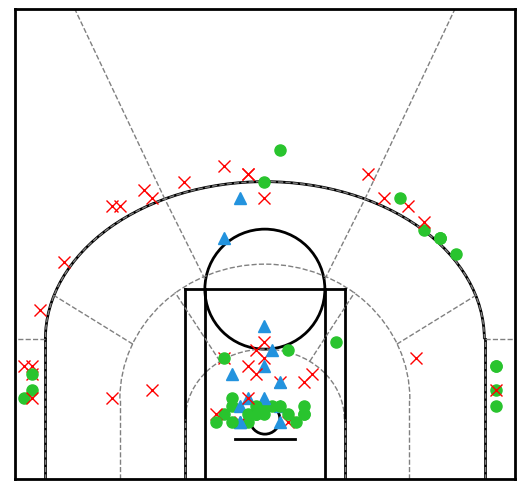

In [6]:
shots = file['ovr_data']['shooting_locations']

off_PPP = data_PPP['Total PPP']['TOTAL']
off_total_SQ = data_PPP['Total SQ']['TOTAL']
off_shoot_TS = data_PPP['Shooting TS%']['TOTAL']
off_3pt_fg_per = data_PPP['Shooting 3pt FG%']['TOTAL']
off_3pt_SQ = data_PPP['Shooting 3pt SQ']['TOTAL']

off_FTR = data_PPP['Total FTR']['TOTAL']

off_rim_PPP = rim_PPP['Shooting PPP']['TOTAL']
off_rim_TS = rim_PPP['Shooting TS%']['TOTAL']
off_rim_SQ = rim_PPP['Shooting SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
nugg_off_fig = plt.figure(figsize=(5, 4.7))
nugg_off_ax = nugg_off_fig.add_axes([0, 0, 1, 1])
nugg_off_ax = create_court(nugg_off_ax, 'black')


for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        nugg_off_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        nugg_off_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        nugg_off_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)

print(f'NUGGETS OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {off_PPP}')
print(f'Shooting TS%: {off_shoot_TS} on {off_total_SQ} SQ')
print(f'3pt FG %: {off_3pt_fg_per} on {off_3pt_SQ} SQ\n')

print(f'Total FTR: {off_FTR}\n')

print(f'Rim PPP: {off_rim_PPP}')
print(f'Rim TS%: {off_rim_TS} on {off_rim_SQ} SQ')
        
plt.show()

In [7]:
opp_PPP = opp_off_file['ovr_data']['data']
opp_PPP = pd.DataFrame(opp_PPP).transpose()
opp_PPP = PPP(opp_PPP)
opp_PPP

Total PPP % of Poss. Total TO Total Creation % Total FTR  \
PNR Ball Handler         0.62       22.7        4             44.8       0.0   
PNR Screener             1.11        7.0        2             11.1       0.0   
DHO Ball Handler          0.5        4.7        0             33.3       0.0   
DHO Screener              0.0        0.8        0              0.0       0.0   
ISOLATION                1.22       10.8        1             24.8      0.17   
TRANSITION               1.52        9.8        2             27.5      1.14   
Attacking Closeouts      1.12       14.7        3             21.3      0.29   
Catch & Shoot            0.56       14.1        0              5.6       0.0   
Off Ball Screens         1.02        5.4        0             29.1      0.33   
Cutting                  1.83        6.4        0             10.7      0.83   
Off. Rebounds            2.08        4.5        0             50.0       1.0   
TOTAL                    1.02        128      9.4             25.8      0.24   

                    Total TS% Total SQ Total 2pt FGA Total 2pt FG%  \
PNR Ball Handler         36.0     3.44            18          33.3   
PNR Screener            71.43     3.43             4          50.0   
DHO Ball Handler         25.0     3.17             3           0.0   
DHO Screener              0.0      4.0             1           0.0   
ISOLATION               68.33     2.08            11          72.7   
TRANSITION              98.55     3.14             2         100.0   
Attacking Closeouts     66.62     3.36            11          63.6   
Catch & Shoot           27.78     3.89             4          50.0   
Off Ball Screens        54.35      3.5             4          75.0   
Cutting                 91.46      3.5             6          83.3   
Off. Rebounds          112.78      3.5             3         100.0   
TOTAL                   57.49     3.33            67          56.7   

                    Total 2pt SQ Total 3pt FGA Total 3pt FG% Total 3pt SQ  \
PNR Ball Handler            3.17             7          28.6         4.14   
PNR Screener                 3.0             3          66.7          4.0   
DHO Ball Handler             3.0             3          33.3         3.33   
DHO Screener                 4.0             0           N/A          N/A   
ISOLATION                   2.09             1           0.0          2.0   
TRANSITION                   0.0             5          60.0          4.4   
Attacking Closeouts         3.09             3          33.3         4.33   
Catch & Shoot                4.0            14          14.3         3.86   
Off Ball Screens             3.5             2           0.0          3.5   
Cutting                      3.5             0           N/A          N/A   
Off. Rebounds                3.0             1         100.0          5.0   
TOTAL                       2.97            39          30.8         3.95   

                    Shooting PPP % of Shooting Poss. Shooting TO  \
PNR Ball Handler            0.38                16.8           4   
PNR Screener                0.88                 8.4           2   
DHO Ball Handler            0.75                 4.2           0   
DHO Screener                 0.0                 1.1           0   
ISOLATION                   1.15                11.0           1   
TRANSITION                  1.43                 9.6           2   
Attacking Closeouts         1.15                15.5           3   
Catch & Shoot               0.47                17.9           0   
Off Ball Screens            1.43                 5.1           0   
Cutting                     1.78                 7.7           0   
Off. Rebounds               1.74                 3.0           0   
TOTAL                       0.95                  95       12.63   

                    Shooting Freq. Shooting FTR Shooting TS% Shooting SQ  \
PNR Ball Handler              55.2          0.0         25.0        3.08   
PNR Screener                 

In [9]:
opp_rim_PPP = opp_off_file['Rim']['data']
opp_rim_PPP = pd.DataFrame(opp_rim_PPP).transpose()
opp_rim_PPP = PPP(opp_rim_PPP)
opp_rim_PPP

OPPONENT OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.06
Total TS%: 59.35 on 3.06 SQ
Total 3pt%: 44.4 on 4.26 SQ

Total FTR: 0.27

Rim PPP: 1.09
Rim TS%: 57.62 on 2.31 SQ


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.6,18.2,1,40.0,0.0,33.33,2.89,9,33.3,2.89,0,N/A,N/A,0.33,14.0,1,60.0,0.0,20.0,2.4,6,20.0,2.4,0,N/A,N/A,1.0,33.3,0,40.0,0.0,50.0,3.5,4,50.0,3.5,0,N/A,N/A
PNR Screener,1.0,3.6,0,0.0,0.0,50.0,2.5,2,50.0,2.5,0,N/A,N/A,1.0,4.7,0,100.0,0.0,50.0,2.5,2,50.0,2.5,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,0.0,1.8,0,0.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A,0.0,2.3,0,100.0,0.0,0.0,2.0,1,0.0,2.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,1.6,12.5,0,35.5,0.33,85.4,1.17,6,83.3,1.17,0,N/A,N/A,1.35,10.3,0,64.5,0.25,75.0,1.5,4,75.0,1.5,0,N/A,N/A,2.05,20.3,0,35.5,0.5,102.46,0.5,2,100.0,0.5,0,N/A,N/A
TRANSITION,1.33,13.7,2,19.1,4.0,107.76,0.0,2,100.0,0.0,0,N/A,N/A,1.15,14.1,2,80.9,7.0,109.38,0.0,6,100.0,0.0,0,N/A,N/A,2.08,12.0,0,19.1,1.0,104.17,0.0,1,100.0,0.0,0,N/A,N/A
Attacking Closeouts,1.1,23.2,2,7.8,0.44,65.06,3.11,9,55.6,3.11,0,N/A,N/A,1.02,27.3,2,92.2,0.5,61.48,2.88,11,50.0,2.88,0,N/A,N/A,2.0,8.3,0,7.8,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A
Catch & Shoot,2.0,1.8,0,100.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,2.0,8.3,0,100.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A
Off Ball Screens,1.6,3.4,0,0.0,2.0,104.17,4.0,1,100.0,4.0,0,N/A,N/A,1.6,4.4,0,100.0,2.0,104.17,4.0,1,100.0,4.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,1.83,14.9,0,10.7,0.83,91.46,3.5,6,83.3,3.5,0,N/A,N/A,1.78,17.0,0,89.3,0.5,88.8,3.5,7,83.3,3.5,0,N/A,N/A,2.27,7.3,0,10.7,1.0,113.64,N/A,0,N/A,N/A,0,N/A,N/A


OPPONENT OFFENSE SHOT CHART
--------------------------
Total PPP: 1.02
True Shooting %: 56.06 on 3.33 SQ
3pt FG %: 29.2 on 3.88 SQ

Total FTR: 0.24

Rim PPP: 1.15
Rim TS%: 69.14 on 2.6 SQ


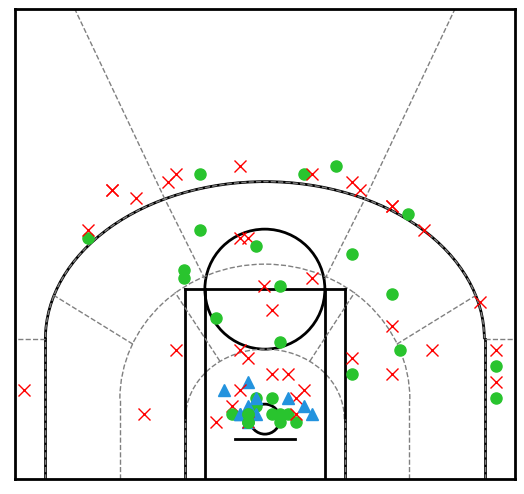

In [10]:
opp_shots = opp_off_file['ovr_data']['shooting_locations']

opp_off_PPP = opp_PPP['Total PPP']['TOTAL']
opp_total_SQ = opp_PPP['Total SQ']['TOTAL']
opp_shoot_TS = opp_PPP['Shooting TS%']['TOTAL']
opp_3pt_fg_per = opp_PPP['Shooting 3pt FG%']['TOTAL']
opp_3pt_SQ = opp_PPP['Shooting 3pt SQ']['TOTAL']

opp_FTR = opp_PPP['Total FTR']['TOTAL']

opp_off_rim_PPP = opp_rim_PPP['Shooting PPP']['TOTAL']
opp_rim_TS = opp_rim_PPP['Shooting TS%']['TOTAL']
opp_rim_SQ = opp_rim_PPP['Shooting SQ']['TOTAL']


# Draw basketball court
opp_fig = plt.figure(figsize=(5, 4.7))
opp_ax = opp_fig.add_axes([0, 0, 1, 1])
opp_ax = create_court(opp_ax, 'black')

for shot in opp_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        opp_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        opp_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        opp_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
    
print(f'OPPONENT OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {opp_off_PPP}')
print(f'True Shooting %: {opp_shoot_TS} on {opp_total_SQ} SQ')
print(f'3pt FG %: {opp_3pt_fg_per} on {opp_3pt_SQ} SQ\n')

print(f'Total FTR: {opp_FTR}\n')

print(f'Rim PPP: {opp_off_rim_PPP}')
print(f'Rim TS%: {opp_rim_TS} on {opp_rim_SQ} SQ')
    
edwards_PPP = edwards['ovr_data']['data']
edwards_PPP = pd.DataFrame(edwards_PPP).transpose()
edwards_PPP = PPP(edwards_PPP)
print('EDWARDS OFFENSE PPP')
edwards_PPP

In [81]:
edwards_rim_data = edwards['Rim']['data']
edwards_rim_data = pd.DataFrame(edwards_rim_data).transpose()
edwards_rim_data = PPP(edwards_rim_data)
print('EDWARDS RIM PPP')
edwards_rim_data

EDWARDS RIM PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,2.13,23.5,0,46.8,2.0,106.38,5.0,1,100.0,5.0,0,N/A,N/A,2.0,16.7,0,53.2,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,2.27,44.0,0,46.8,1.0,113.64,N/A,0,N/A,N/A,0,N/A,N/A
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
TRANSITION,1.77,70.5,0,15.6,2.0,88.65,3.0,3,66.7,3.0,0,N/A,N/A,1.68,79.3,0,84.4,1.33,84.03,3.0,4,66.7,3.0,0,N/A,N/A,2.27,44.0,0,15.6,1.0,113.64,N/A,0,N/A,N/A,0,N/A,N/A
Attacking Closeouts,0.0,12.5,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,50.0,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A
Catch & Shoot,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Off Ball Screens,2.0,12.5,0,0.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,2.0,16.7,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


EDWARDS OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.02
Total TS%: 60.27 on 3.44 SQ
Total 3pt%: 25.0 on 4.17 SQ

Total FTR: 0.4

Rim PPP: 1.68
Rim TS%: 84.03 on 3.33 SQ


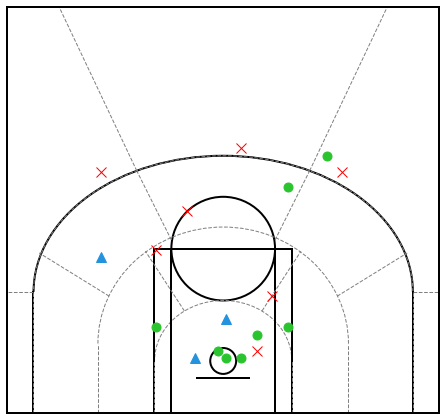

In [84]:
edwards_shots = edwards['ovr_data']['shooting_locations']

edwards_total_PPP = edwards_PPP['Total PPP']['TOTAL']
edwards_ovr_ts_per = edwards_PPP['Total TS%']['TOTAL']
edwards_ovr_3pt_per = edwards_PPP['Shooting 3pt FG%']['TOTAL']
edwards_ovr_SQ = edwards_PPP['Total SQ']['TOTAL']
edwards_ovr_3pt_SQ = edwards_PPP['Total 3pt SQ']['TOTAL']

edwards_ovr_ftr = edwards_PPP['Shooting FTR']['TOTAL']

edwards_rim_PPP = edwards_rim_data['Total PPP']['TOTAL']
edwards_rim_ts_per = edwards_rim_data['Total TS%']['TOTAL']
edwards_rim_SQ = edwards_rim_data['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(6, 5.64))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in edwards_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
        '''
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
        '''
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('EDWARDS OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {edwards_total_PPP}')
print(f'Total TS%: {edwards_ovr_ts_per} on {edwards_ovr_SQ} SQ')
print(f'Total 3pt%: {edwards_ovr_3pt_per} on {edwards_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {edwards_ovr_ftr}\n')
print(f'Rim PPP: {edwards_rim_PPP}')
print(f'Rim TS%: {edwards_rim_ts_per} on {edwards_rim_SQ} SQ')
        
plt.show()